Imports

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
import idx2numpy as dxpy
import matplotlib.pyplot as plt
import cv2
import random

Load Data

In [35]:
RESOURCES = [
        '.\\train-images.idx3-ubyte',
        '.\\train-labels.idx1-ubyte',
        '.\\t10k-images.idx3-ubyte',
        '.\\t10k-labels.idx1-ubyte']

#load data in <class 'numpy.ndarray'>
train_images = dxpy.convert_from_file(RESOURCES[0])
train_labels = dxpy.convert_from_file(RESOURCES[1])
test_images = dxpy.convert_from_file(RESOURCES[2])
test_labels = dxpy.convert_from_file(RESOURCES[3])

Print Data

Train images shape: (60000, 28, 28)   |    Train labels shape: (60000,)
Test images shape: (10000, 28, 28)    |   Test labels shape: (10000,)

Random train data label (index:3079): 7 
Random train data image:


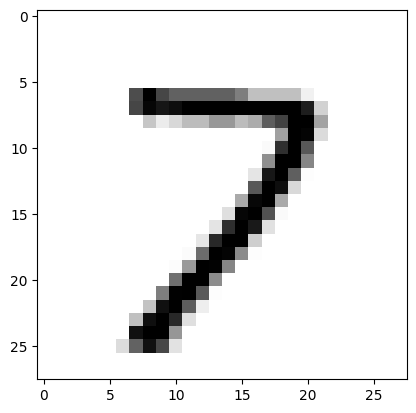

In [36]:
print(f"Train images shape: {train_images.shape}   |    Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}    |   Test labels shape: {test_labels.shape}")

#print a random train data
sample = random.randint(0,6000)

print(f"\nRandom train data label (index:{sample}): {train_labels[sample]} ")
print("Random train data image:")
plt.imshow(train_images[sample], cmap=plt.cm.binary)

Reshape data

In [37]:

train_images = train_images.reshape(60000, 28 * 28)
test_images = test_images.reshape(10000, -1)

print(f"Train images shape: {train_images.shape}   |    Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}    |   Test labels shape: {test_labels.shape}")

Train images shape: (60000, 784)   |    Train labels shape: (60000,)
Test images shape: (10000, 784)    |   Test labels shape: (10000,)


Scale Data

In [38]:
train_images = train_images / 255
test_images = test_images / 255

# Check the range of pixel values
print("Training images pixel values range from", train_images.min(), "to", train_images.max())
print("Test images pixel values range from", test_images.min(), "to", test_images.max())

Training images pixel values range from 0.0 to 1.0
Test images pixel values range from 0.0 to 1.0


Convert labels to categorical

In [39]:
from keras import utils

train_labels =utils.to_categorical(train_labels, num_classes=10)
test_labels = utils.to_categorical(test_labels, num_classes=10)

Model Definition

In [40]:
# from numpy import mean
# from numpy import std
# from matplotlib import pyplot as plt
# from sklearn.model_selection import KFold
# from keras import layers
# from keras import Sequential
# from keras import optimizers
# from sklearn.metrics import accuracy_score

# # from tensorflow import optimizers

# # from tensorflow.callbacks import ModelCheckpoint
# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(layers.Dense(10, activation='softmax'))
# # compile model
# opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [41]:
from keras import Sequential
from keras import layers
from keras import optimizers


# Define the model
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=784))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 


#optimizers
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)


# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128)

# Make predictions
predictions_probabilities = model.predict(test_images)
predictions = np.argmax(predictions_probabilities, axis=1)

c:\Users\spotink\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3165 - loss: 2.0356 - val_accuracy: 0.8302 - val_loss: 0.6981
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8512 - loss: 0.5670 - val_accuracy: 0.9024 - val_loss: 0.3518
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9015 - loss: 0.3499 - val_accuracy: 0.9166 - val_loss: 0.2917
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9184 - loss: 0.2877 - val_accuracy: 0.9292 - val_loss: 0.2512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9265 - loss: 0.2514 - val_accuracy: 0.9350 - val_loss: 0.2244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Metrics

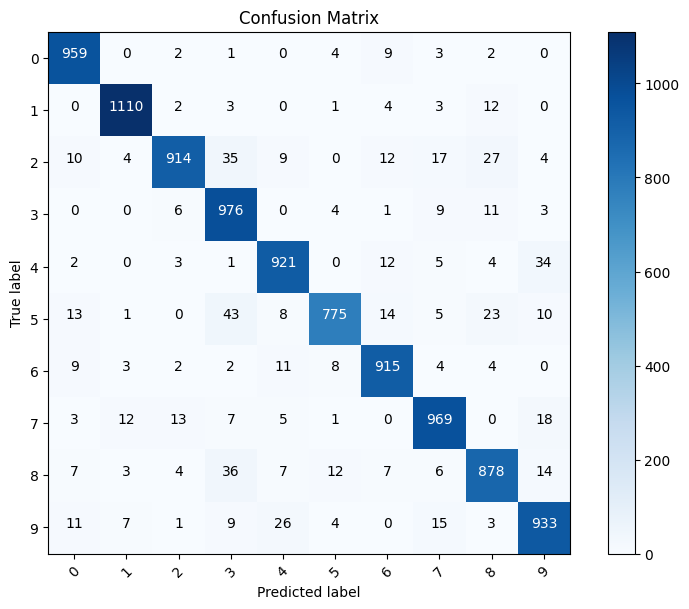

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9234 - loss: 0.2580
Accuracy: 93.50%


In [42]:
from sklearn.metrics import confusion_matrix
import itertools


# Calculate and print the confusion matrix
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
cm = confusion_matrix(np.argmax(test_labels, axis=1), predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, int(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Evaluate the model
_, acc = model.evaluate(test_images, test_labels)
print(f'Accuracy: {acc * 100:.2f}%')